In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/df_file.csv")

In [ ]:
data.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
MAX_VOCAB_SIZE = 20000  # Maximum number of words in vocabulary
MAX_SEQ_LENGTH = 300    # Maximum length of text sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(data['Text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['Text'])

# Pad sequences to ensure consistent length
X = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH)

# Convert labels to numpy array
y = data['Label'].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Parameters
EMBEDDING_DIM = 100  # Dimension of word embeddings

# Build the model
model = Sequential([
    # Embedding layer
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQ_LENGTH),

    # Convolutional layer
    Conv1D(filters=128, kernel_size=5, activation='relu'),

    # Global max pooling
    GlobalMaxPooling1D(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Adjust based on dataset size
    batch_size=32,
    verbose=1
)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - accuracy: 0.2389 - loss: -6.3960 - val_accuracy: 0.2202 - val_loss: -216.4562
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.2562 - loss: -1183.1256 - val_accuracy: 0.2202 - val_loss: -9530.3682
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - accuracy: 0.2345 - loss: -20407.5879 - val_accuracy: 0.2202 - val_loss: -81808.8281
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.2211 - loss: -140848.6719 - val_accuracy: 0.2202 - val_loss: -368870.8438
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.2168 - loss: -579852.4375 - val_accuracy: 0.2202 - val_loss: -1139063.0000
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.2103 - loss: -1561603.8750 - val_accuracy: 0.2202 - val_loss: -2758290.5000
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.2326 - loss: -3388542.0000 - val_accuracy: 0.2202 - val_loss: -5605373.5000
Epoch 8/10
56/56 ━━━━━━━━━

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.2f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2414 - loss: -24879988.0000
Validation Accuracy: 0.22


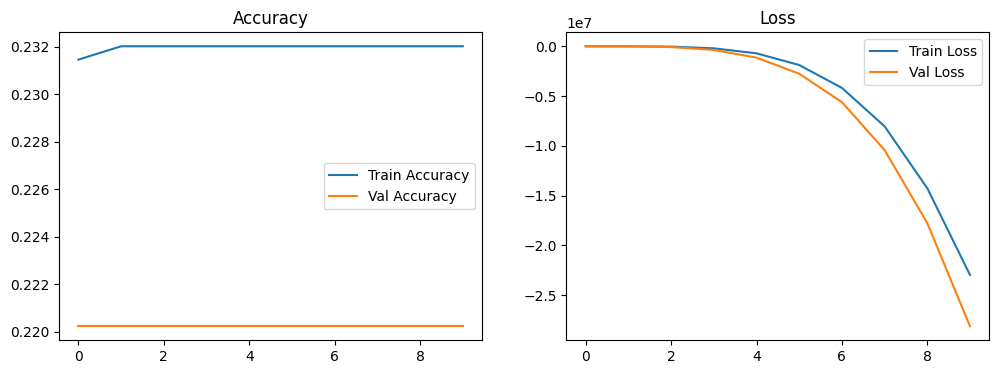

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
model.save('text_classification_cnn.h5')


In [ ]:
# Download GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Load embeddings
embedding_index = {}
with open('glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create embedding matrix
embedding_matrix = np.zeros((MAX_VOCAB_SIZE, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Update the embedding layer in the model
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


--2024-11-23 08:33:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-23 08:33:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-23 08:33:02--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.5’

gl

In [ ]:
import numpy as np  # Import NumPy

# Load GloVe embeddings
embedding_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:  # Ensure proper encoding
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')  # Use np.asarray here
        embedding_index[word] = coefs

print(f"Loaded {len(embedding_index)} word vectors.")


Loaded 400000 word vectors.


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have already trained your model and loaded it
# Load your trained model
from tensorflow.keras.models import load_model
model = load_model('text_classification_cnn.h5')  # Update the path if needed

# Parameters
MAX_VOCAB_SIZE = 20000
MAX_SEQ_LENGTH = 300

# Define the class labels (in the same order as your training labels)
labels = ['Politics', 'Sport', 'Tech', 'Entertainment', 'Business']

# Load the tokenizer used during training
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(data['Text'])  # Fit on the training data

# Function to predict the class of a new text
def predict_class(text):
    # Convert the text to sequence
    seq = tokenizer.texts_to_sequences([text])

    # Pad the sequence to ensure consistent input length
    padded_seq = pad_sequences(seq, maxlen=MAX_SEQ_LENGTH)

    # Predict the class probabilities
    prob = model.predict(padded_seq)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(prob)

    # Return the corresponding class label
    return labels[predicted_class_index]

# Example new input
new_input = "A new tech startup has just raised $10 million in funding."

# Get prediction
predicted_label = predict_class(new_input)
print(f"Predicted label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted label: Politics


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Define categories for prediction
category_labels = {0: 'Sport', 1: 'Business', 2: 'Politics', 3: 'Technology', 4: 'Entertainment'}

# Parameters (ensure they match the ones used during training)
MAX_VOCAB_SIZE = 20000
MAX_SEQ_LENGTH = 300

# Example new input
new_input = "The star player scored a spectacular goal to secure the championship victory for the team."


# Load the trained model (assuming you've already trained the model)
model = load_model('text_classification_cnn.h5')  # Update the path if needed

# Load tokenizer (make sure this matches the tokenizer used during training)
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)

# Function to predict the class of a new text
def predict_class(text):
    # Convert the text to sequence
    seq = tokenizer.texts_to_sequences([text])

    # Pad the sequence to ensure consistent input length
    padded_seq = pad_sequences(seq, maxlen=MAX_SEQ_LENGTH)

    # Predict the class probabilities
    prob = model.predict(padded_seq)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(prob)

    # Return the corresponding class label
    return category_labels[predicted_class_index]

# Get prediction for the new input
predicted_label = predict_class(new_input)
print(f"Predicted label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted label: Sport
